## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns

## Read the data file and review the dataframe

In [2]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## General info about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Check the missing values in the dataset

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Data Cleaning

### Re-format the type of the 'date' column

In [5]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

datetime64[ns]


### Deal with missing values

In [6]:
# Summarizing the data values in 'waterfront' column
df.groupby(by = 'waterfront')['waterfront'].count().sort_values(ascending = False)

waterfront
0.0    19075
1.0      146
Name: waterfront, dtype: int64

About 88% of data in 'waterfront' column has a value of 0 (means that the house has no waterfront view). The NaN values are about 11% of the column data. Therefore, the missing values in 'waterfront' column are replaced with the value of 0. 

In [7]:
# Replace NaN with 0.0 and check the missing values again
df['waterfront'] = df['waterfront'].fillna(0.0)
df['waterfront'].isna().sum()

0

In [8]:
# Summarizing the data values in 'view' column
df.groupby(by = 'view')['view'].count().sort_values(ascending = False)

view
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Most of the values (about 90%) in 'view' column are 0.0  and the missing values are only 0.29% of the column data. Therefore, the NaN values in this column are replaced with 0.0 

In [9]:
# Replace NaN with 0.0 and check the missing values again
df['view'] = df['view'].fillna(0.0)
df['view'].isna().sum()

0

In [10]:
# Summarizing the data values in 'yr_renovated' column
df.groupby(by = 'yr_renovated')['yr_renovated'].count().sort_values(ascending = False)

yr_renovated
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1954.0        1
1971.0        1
1959.0        1
Name: yr_renovated, Length: 70, dtype: int64

Most of the values (about 79%) in the 'yr_renovated' columns are 0.0 which means that the renovated year for most of the houses are unknown. Therefore, it is best to drop the column as replacing NaN with the median of the coumn is useless.

In [11]:
df = df.drop('yr_renovated', axis=1).copy()

In [12]:
# Summarizing the data values in 'sqft_basement' column
df.groupby(by = 'sqft_basement')['sqft_basement'].count().sort_values(ascending = False)

sqft_basement
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2360.0        1
2350.0        1
2310.0        1
2300.0        1
2190.0        1
Name: sqft_basement, Length: 304, dtype: int64

The footage of the basement (sqft_basement2) is equal to the footage of the living space (sqft_living) minus the footage of the house apart from the basement (sqft_above). Therefore, we created a new a column, named 'sqft_basement2' , calculated the footage of the basement and inserted the calculated values into this new column

In [13]:
from numpy import float64
df['sqft_basement2'] = (df['sqft_living'] - df['sqft_above'])
df['sqft_basement2'] = df['sqft_basement2'].astype(float64)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement2
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,400.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,910.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,0.0


Checking the data values in 'sqft_basement2' to make sure they are in float form and also no missing values

In [14]:
# Summarizing the data values in 'sqft_basement2' column
df.groupby(by = 'sqft_basement2')['sqft_basement2'].count().sort_values(ascending = False)

sqft_basement2
0.0       13110
600.0       221
700.0       218
500.0       214
800.0       206
          ...  
2360.0        1
475.0         1
2350.0        1
1930.0        1
4820.0        1
Name: sqft_basement2, Length: 306, dtype: int64

In [15]:
df['sqft_basement2'].isna().sum()

0

We now can drop the original 'sqft_basement' column.

In [16]:
df = df.drop('sqft_basement', axis=1).copy()

In [17]:
# Rename the 'sqft_basement2' back to 'sqft_basement'
df = df.rename(columns={'sqft_basement2':'sqft_basement'}).copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,400.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,910.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0.0


Check the dataset general information and missing values again

In [18]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat            2159

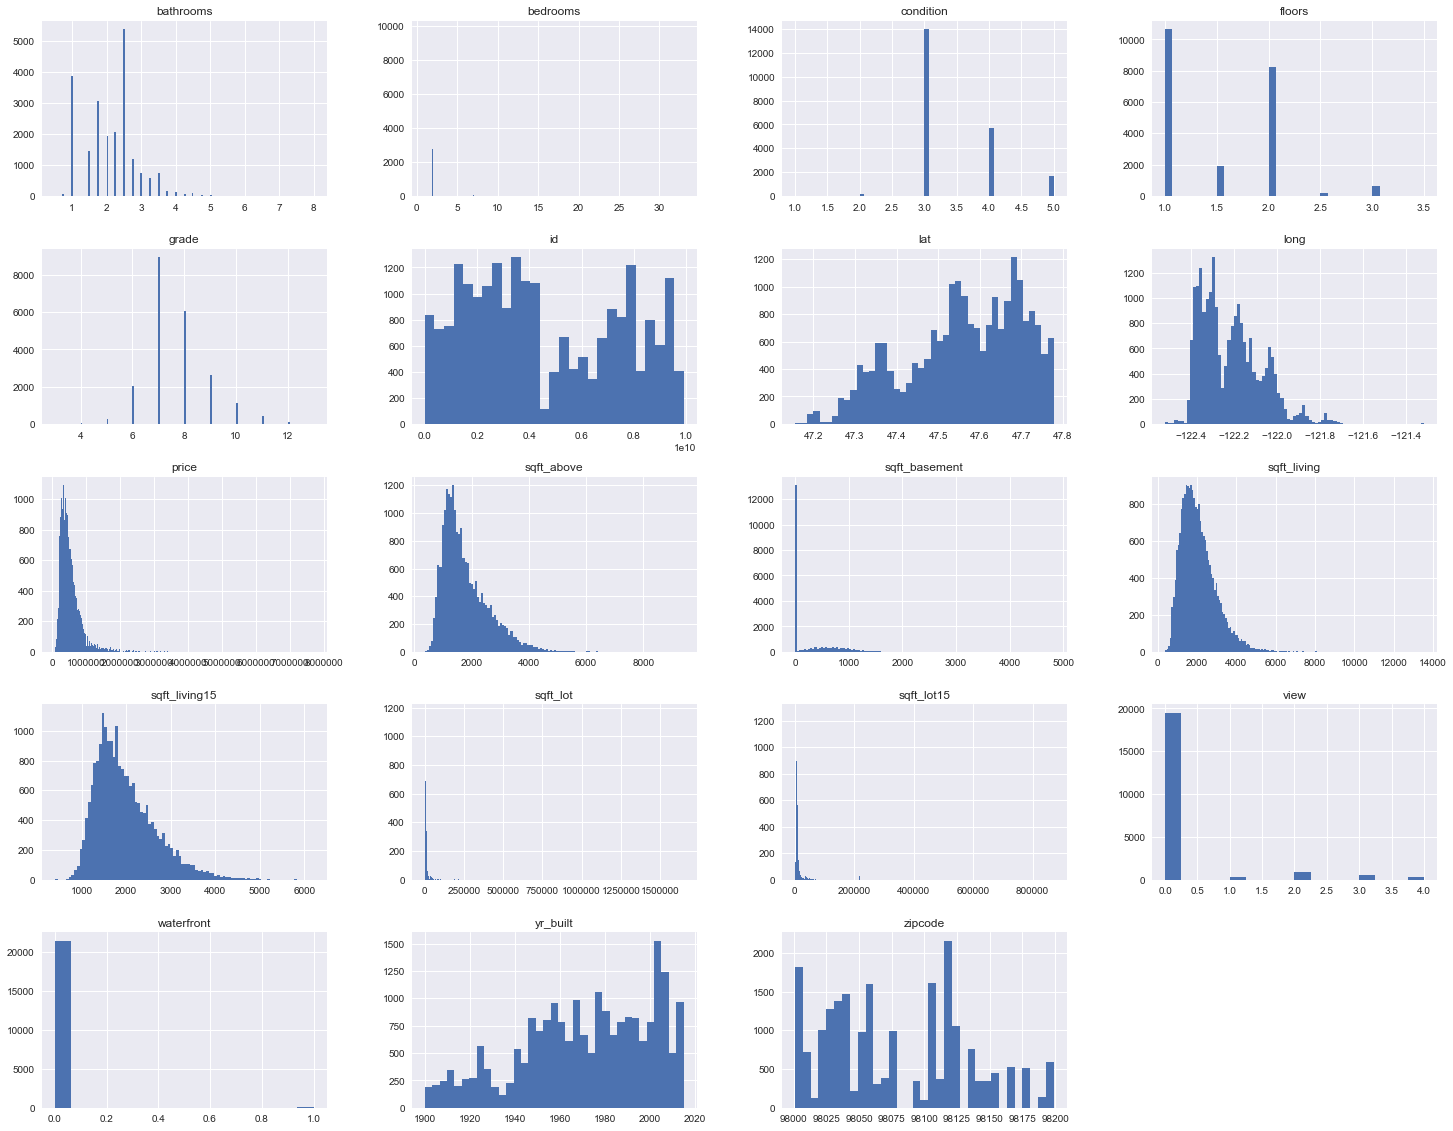

In [19]:
df.hist(figsize=(25,20), bins='auto');

### Checking for outliers 

In [20]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,291.725008
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950,442.667800
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,560.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,4820.000000


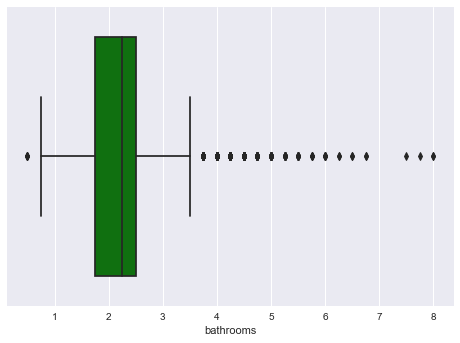

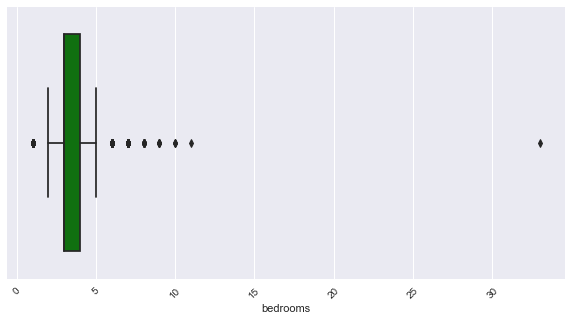

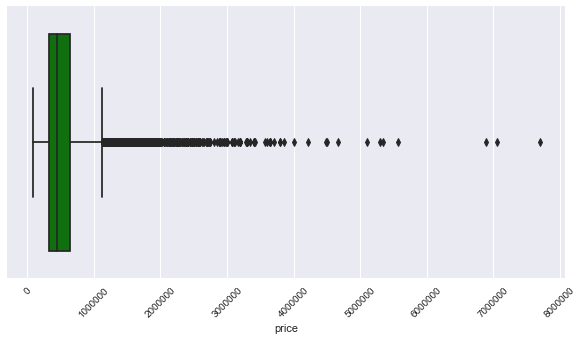

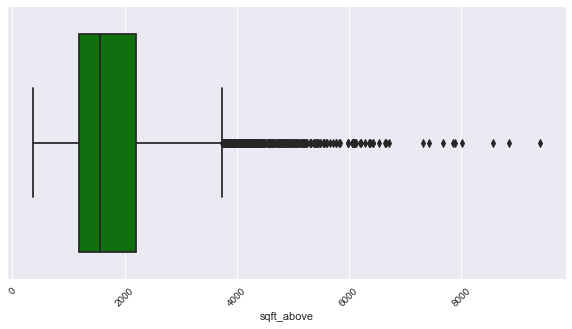

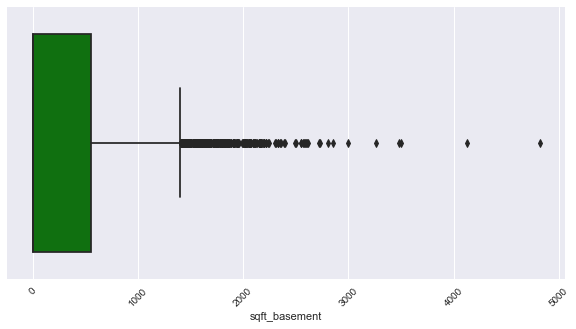

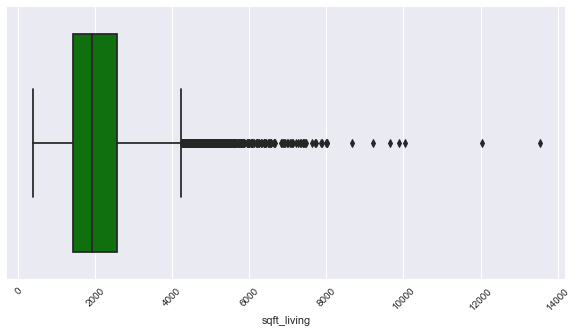

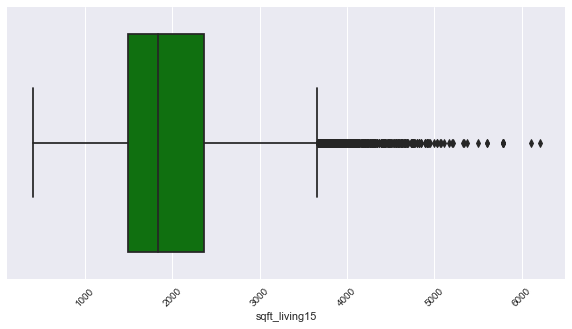

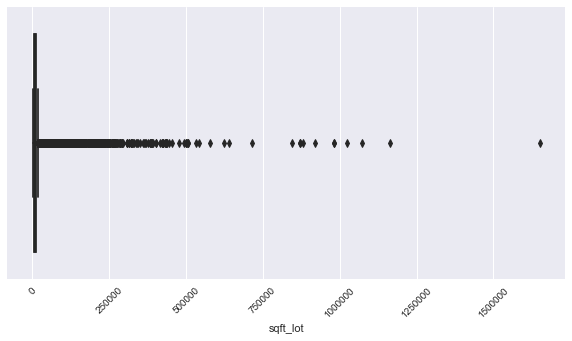

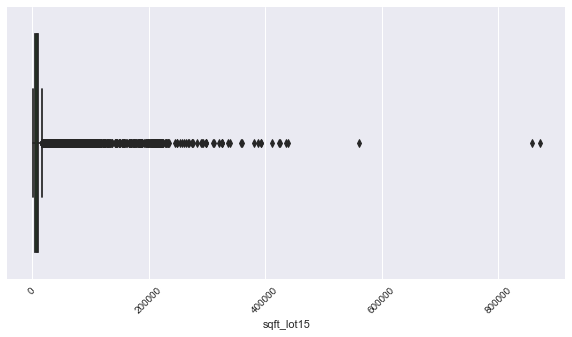

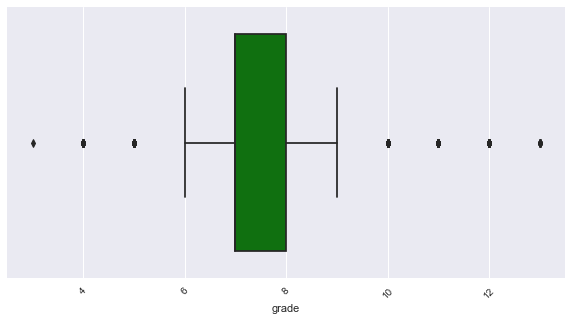

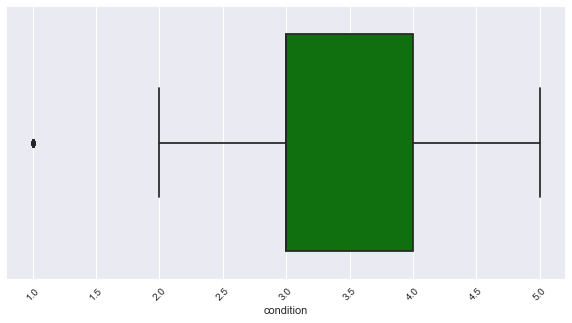

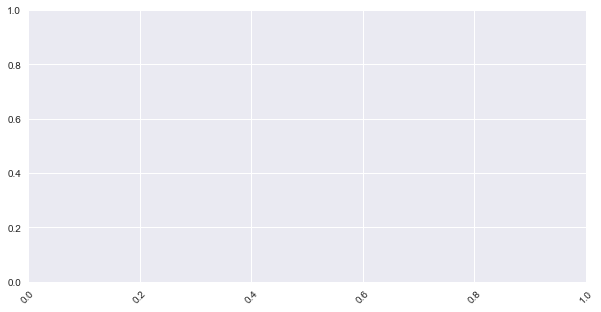

In [21]:
cont = ['bathrooms', 'bedrooms', 'price', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15', 'sqft_lot', 
        'sqft_lot15', 'grade', 'condition']
for col in cont:
    sns.boxplot(x=col, data=df, color='green')
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=45)

There are a lot of unrealistic outliers in the dataset. For instance, the number of bedrooms run to more than 30 bedrooms ot the sale price of the house run to more $8 millions dollars. Therefore, we omit theses outliers for more accurate final results. 

In [22]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)

In [23]:
# Replacing the outliers with None
for col in cont:
    df[col] = df[col].map(lambda x: None if x > upper_range[col] else x)
    df[col] = df[col].map(lambda x: None if x < lower_range[col] else x)

# dropping rows with null values
df = df.dropna()

# Checking if the outliers have been dropped
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
count,1.660700e+04,1.660700e+04,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000,16607.000000
mean,4.760942e+09,4.520989e+05,3.268682,1.984404,1838.475944,7053.725477,1.466099,0.000963,0.132595,3.416812,7.401156,1590.458421,1969.984163,98081.924189,47.559635,-122.230849,1815.431505,6932.410670,248.017523
std,2.867374e+09,1.890064e+05,0.775045,0.648982,623.694157,3384.478918,0.544199,0.031025,0.550477,0.644641,0.811422,599.000778,29.702470,54.047951,0.139994,0.131755,514.711176,3016.246718,366.761155
min,2.800031e+06,8.200000e+04,2.000000,0.750000,560.000000,520.000000,1.000000,0.000000,0.000000,2.000000,6.000000,480.000000,1900.000000,98001.000000,47.155900,-122.503000,620.000000,651.000000,0.000000
25%,2.325039e+09,3.054975e+05,3.000000,1.500000,1360.000000,4750.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1150.000000,1950.000000,98033.000000,47.466600,-122.338000,1440.000000,4820.000000,0.000000
50%,4.070700e+09,4.190000e+05,3.000000,2.000000,1770.000000,7029.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1440.000000,1971.000000,98074.000000,47.569500,-122.270000,1720.000000,7169.000000,0.000000
75%,7.517500e+09,5.639750e+05,4.000000,2.500000,2240.000000,9000.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1920.000000,1997.000000,98119.000000,47.681900,-122.155000,2130.000000,8744.000000,500.000000
max,9.900000e+09,1.120000e+06,5.000000,3.500000,4200.000000,19141.000000,3.500000,1.000000,4.000000,5.000000,9.000000,3740.000000,2015.000000,98199.000000,47.777600,-121.319000,3640.000000,17550.000000,1400.000000


### Check for duplicate values

The 'id' column is the column that supposed to have unique values as it is the unique number to identify each house. Therefore, any existing duplicates in 'id' column are eliminated from the dataset.

In [24]:
len(df[df['id'].duplicated()])

135

In [25]:
df.drop_duplicates(subset='id', inplace=True)

Now that the dataset is cleaned from missing values and duplicated values. We can also drop the 'id' column as it is not beneficial to our models later.

In [26]:
df = df.drop('id', axis=1).copy()
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
0,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,1955,98178,47.5112,-122.257,1340.0,5650.0,0.0
1,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,1951,98125,47.7210,-122.319,1690.0,7639.0,400.0
2,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,1933,98028,47.7379,-122.233,2720.0,8062.0,0.0
3,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,1965,98136,47.5208,-122.393,1360.0,5000.0,910.0
4,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,1987,98074,47.6168,-122.045,1800.0,7503.0,0.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16472 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           16472 non-null  datetime64[ns]
 1   price          16472 non-null  float64       
 2   bedrooms       16472 non-null  float64       
 3   bathrooms      16472 non-null  float64       
 4   sqft_living    16472 non-null  float64       
 5   sqft_lot       16472 non-null  float64       
 6   floors         16472 non-null  float64       
 7   waterfront     16472 non-null  float64       
 8   view           16472 non-null  float64       
 9   condition      16472 non-null  float64       
 10  grade          16472 non-null  float64       
 11  sqft_above     16472 non-null  float64       
 12  yr_built       16472 non-null  int64         
 13  zipcode        16472 non-null  int64         
 14  lat            16472 non-null  float64       
 15  long           1647

### Deal with categorical data

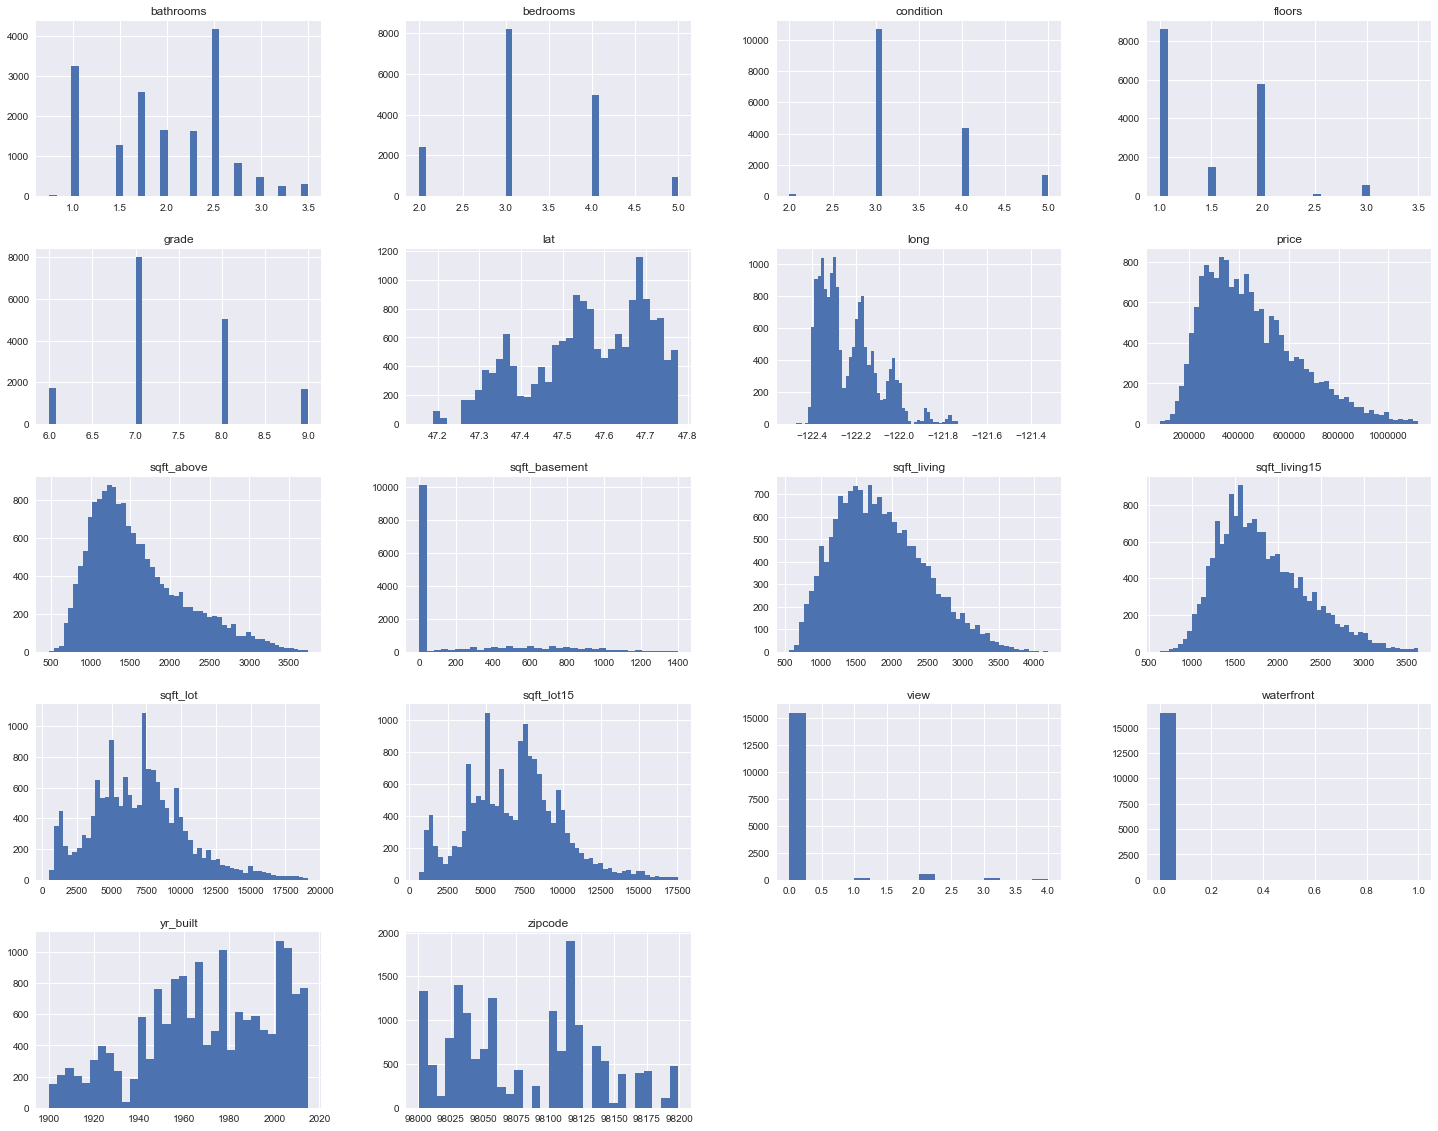

In [28]:
# Plot the dataset again
df.hist(figsize=(25,20), bins='auto');

In [29]:
for column in df.columns:
    print(column, df[column].nunique())

date 369
price 3018
bedrooms 4
bathrooms 12
sqft_living 683
sqft_lot 6969
floors 6
waterfront 2
view 5
condition 4
grade 4
sqft_above 654
yr_built 116
zipcode 70
lat 4713
long 611
sqft_living15 570
sqft_lot15 6130
sqft_basement 176


Based on the histograms and the number of unique values above, the categorical data are bedrooms, bathrooms, floors, waterfront, view, condition, grade, latitude, longitude, and zipcode. However, except for latitude, longitude, and zipcode, other categorical features have numeric data and hierarchical orders. For example, 3 bedrooms ranks higher than 2 bedrooms which ranks higher than 1 bedroom. Therefore, these features can be used in models without having to perform label encoding or creating dummy variables.

For the 'zipcode', it does not have a hierachical order. Therefore, one hot encoding is done in order to include them in the model. However, there are 70 unique zipcodes which are a lot to create addition columns. These 70 zipcodes are placed in 10 different bins and then performing one hot encoding.

In [30]:
#checking the pentiles of zipcode
df['zipcode'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

#creating bins based on the quartiles
bins = [98000, 98008, 98028, 98038, 98053, 98065, 98103, 98115, 98125, 98155, 98200]
bins_cut = pd.cut(df['zipcode'], bins)
bins_cut = bins_cut.cat.as_ordered()
bins_cut.head()

0    (98155, 98200]
1    (98115, 98125]
2    (98008, 98028]
3    (98125, 98155]
4    (98065, 98103]
Name: zipcode, dtype: category
Categories (10, interval[int64]): [(98000, 98008] < (98008, 98028] < (98028, 98038] < (98038, 98053] ... (98103, 98115] < (98115, 98125] < (98125, 98155] < (98155, 98200]]

[Text(0, 0, '(98028, 98038]'),
 Text(0, 0, '(98125, 98155]'),
 Text(0, 0, '(98115, 98125]'),
 Text(0, 0, '(98103, 98115]'),
 Text(0, 0, '(98000, 98008]'),
 Text(0, 0, '(98053, 98065]'),
 Text(0, 0, '(98065, 98103]'),
 Text(0, 0, '(98155, 98200]'),
 Text(0, 0, '(98008, 98028]'),
 Text(0, 0, '(98038, 98053]')]

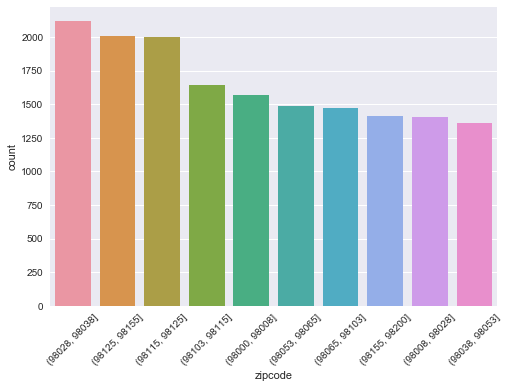

In [31]:
graph = sns.countplot(data=df, x=bins_cut, order=bins_cut.value_counts().index)
graph.set_xticklabels(graph.get_xticklabels(), rotation=45)

In [32]:
# Now, replace the original 'zipcode' column with the created 'bins_cut'
df['zipcode']=bins_cut

# Create dummy variables, dropping one variable to avoid dummy variable trap
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix = 'zip', drop_first=True)

# Then, drop the original 'zipcode' column
df = df.drop('zipcode', axis=1).copy()

# Add the zipcode dummy variables into the existing dataframe
df = pd.concat([df, zipcode_dummies], axis=1).copy()

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,"zip_(98008, 98028]","zip_(98028, 98038]","zip_(98038, 98053]","zip_(98053, 98065]","zip_(98065, 98103]","zip_(98103, 98115]","zip_(98115, 98125]","zip_(98125, 98155]","zip_(98155, 98200]"
0,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,...,0.0,0,0,0,0,0,0,0,0,1
1,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,...,400.0,0,0,0,0,0,0,1,0,0
2,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,...,0.0,1,0,0,0,0,0,0,0,0
3,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,...,910.0,0,0,0,0,0,0,0,1,0
4,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,...,0.0,0,0,0,0,1,0,0,0,0


We also need to change the name of zipcode_dummies columns to avoid errors when doing modeling 

In [33]:
df = df.rename(columns={'zip_(98008, 98028]':'zip_98008_98028', 'zip_(98028, 98038]':'zip_98028_98038',
                        'zip_(98038, 98053]':'zip_98038_98053', 'zip_(98053, 98065]':'zip_98053_98065', 
                        'zip_(98065, 98103]':'zip_98065_98103', 'zip_(98103, 98115]':'zip_98103_98115', 
                        'zip_(98115, 98125]':'zip_98115_98125', 'zip_(98125, 98155]':'zip_98125_98155',
                        'zip_(98155, 98200]':'zip_98155_98200'}).copy()

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,zip_98008_98028,zip_98028_98038,zip_98038_98053,zip_98053_98065,zip_98065_98103,zip_98103_98115,zip_98115_98125,zip_98125_98155,zip_98155_98200
0,2014-10-13,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,...,0.0,0,0,0,0,0,0,0,0,1
1,2014-12-09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,...,400.0,0,0,0,0,0,0,1,0,0
2,2015-02-25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,...,0.0,1,0,0,0,0,0,0,0,0
3,2014-12-09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,...,910.0,0,0,0,0,0,0,0,1,0
4,2015-02-18,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,...,0.0,0,0,0,0,1,0,0,0,0


The latitude and longitude are also categorical variables with no hierachical order. However, since the zipcode is already "treated", we can used this data to predict the house price for a simpler model. 

In [34]:
# Drop both 'lat' and 'long' columns
df = df.drop(['lat', 'long'], axis=1).copy()

## Check for Multicollinearity of features

Text(0.5, 1, 'Correlation > 0.75')

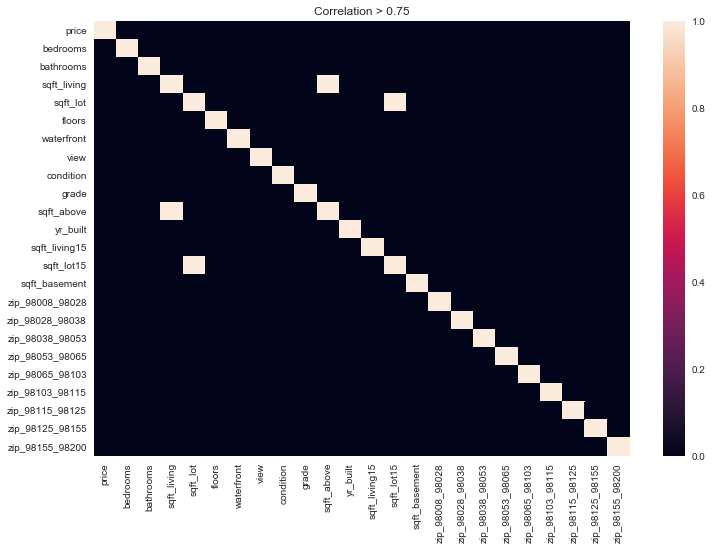

In [35]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr() > 0.75)
plt.title('Correlation > 0.75')

From the heatmap plot above, 'sqft_living' is correlated with 'sqft_above' and 'sqft_lot' is correlated with 'sqft_lot15'.

Plot 'sqft_living', 'sqft_above', 'sqft_lot' and 'sqft_lot15' against the target 'price' to determine which features are highly correlated with the target higher than others. 

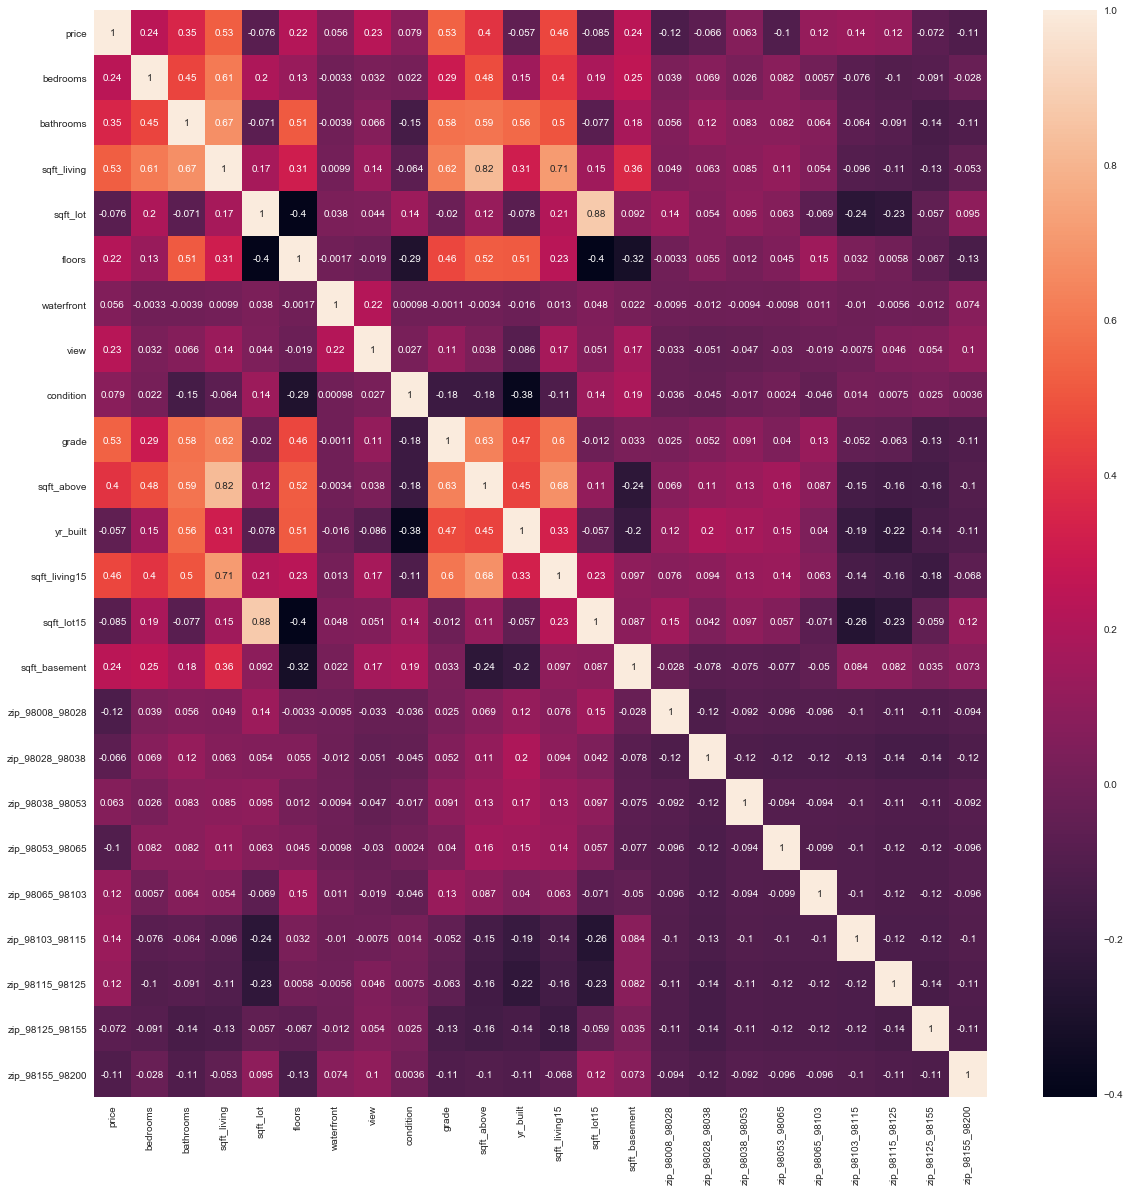

In [36]:
fig2 = plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

Correlation values between: 

Price and 'sqft_living' = 0.53

Price and 'sqft_above' = 0.4

Price and 'sqft_lot' = -0.076

Price and 'sqft_lot15' = -0.085

Based on the correlation values above, we drop the 'sqft_above' and 'sqft_lot15' columns

In [37]:
df = df.drop(['sqft_above', 'sqft_lot15'], axis=1).copy()

## Normalizing the data

We need to convert all of our numeric columns to the same scale by normalizing our dataset. We normalize the data by converting each numeric value to it's corresponding z-score for the column, which is obtained by subtracting the column's mean and then dividing by the column's standard deviation for every value.

'price' is not normalized because this is the feature to be predicted.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16472 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             16472 non-null  datetime64[ns]
 1   price            16472 non-null  float64       
 2   bedrooms         16472 non-null  float64       
 3   bathrooms        16472 non-null  float64       
 4   sqft_living      16472 non-null  float64       
 5   sqft_lot         16472 non-null  float64       
 6   floors           16472 non-null  float64       
 7   waterfront       16472 non-null  float64       
 8   view             16472 non-null  float64       
 9   condition        16472 non-null  float64       
 10  grade            16472 non-null  float64       
 11  yr_built         16472 non-null  int64         
 12  sqft_living15    16472 non-null  float64       
 13  sqft_basement    16472 non-null  float64       
 14  zip_98008_98028  16472 non-null  uint8

In [39]:
import warnings
warnings.filterwarnings("ignore")

In [40]:
for feat in ['sqft_living', 'sqft_lot', 'sqft_living15', 'floors']:
    df[feat] = df[feat].map(lambda x: np.log(x))
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zip_98008_98028,zip_98028_98038,zip_98038_98053,zip_98053_98065,zip_98065_98103,zip_98103_98115,zip_98115_98125,zip_98125_98155,zip_98155_98200
count,1.647200e+04,16472.000000,16472.000000,16472.000000,16472.000000,16472.000000,16472.000000,16472.000000,16472.000000,16472.000000,...,16472.000000,16472.000000,16472.000000,16472.000000,16472.000000,16472.000000,16472.000000,16472.000000,16472.000000,16472.000000
mean,4.522116e+05,3.269063,1.986614,7.458586,8.714704,0.319485,0.000971,0.133378,3.417314,7.404505,...,248.015845,0.085418,0.128582,0.082564,0.090153,0.089424,0.099866,0.121175,0.121782,0.085721
std,1.890334e+05,0.774946,0.648723,0.349278,0.599330,0.353033,0.031152,0.551955,0.644389,0.810643,...,366.828090,0.279511,0.334747,0.275231,0.286410,0.285364,0.299831,0.326341,0.327044,0.279960
min,8.200000e+04,2.000000,0.750000,6.327937,6.253829,0.000000,0.000000,0.000000,2.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.060000e+05,3.000000,1.500000,7.215240,8.465900,0.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.190000e+05,3.000000,2.000000,7.478735,8.856518,0.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.640000e+05,4.000000,2.500000,7.718685,9.104980,0.693147,0.000000,0.000000,4.000000,8.000000,...,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.120000e+06,5.000000,3.500000,8.342840,9.859588,1.252763,1.000000,4.000000,5.000000,9.000000,...,1400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the KDE plots for the results after normalizing

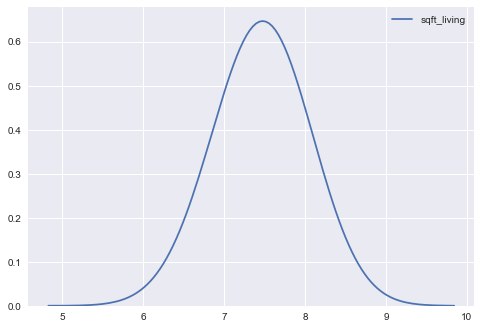

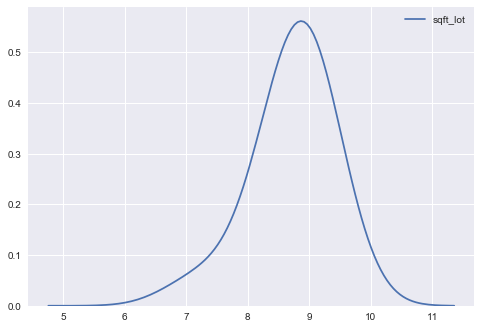

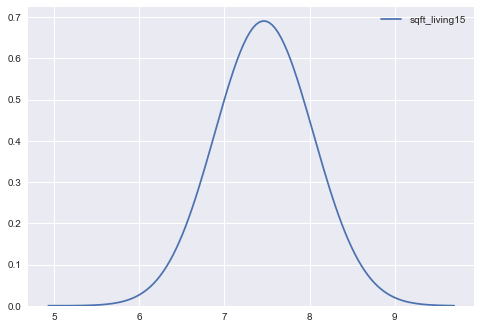

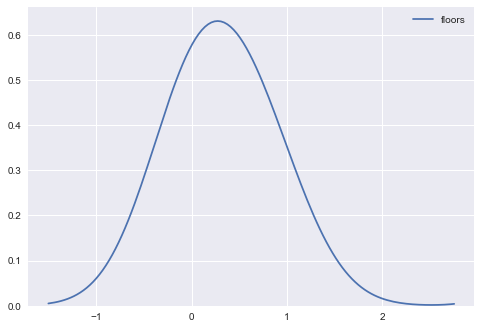

<Figure size 576x396 with 0 Axes>

In [41]:
for feat in ['sqft_living', 'sqft_lot', 'sqft_living15', 'floors']:
    sns.kdeplot(df[feat], bw=0.5)
    plt.figure()

## Saving the cleaned data to a new CSV file

Save the clean data into 'cleaned_kc_house_data.csv' for later analysis 

In [43]:
df.to_csv('cleaned_kc_house_data.csv')